# Prikazovanje podatkov - napredno

## Visualization with pandas

In [15]:
import pandas as pd

In [16]:
oecd = pd.read_csv('data/OECD_data.csv')
# oecd.info()
# oecd.head()

columns_to_drop = ['INDICATOR', 'SUBJECT','FREQUENCY','MEASURE', 'Flag Codes']
oecd.drop(columns=columns_to_drop, inplace=True)

#oecd['TIME'] = pd.to_datetime(oecd['TIME'])

In [17]:
oecd.head()

,LOCATION,TIME,Value
0,AUS,1967,1.875
1,AUS,1968,1.850
2,AUS,1969,1.800
3,AUS,1970,1.625
4,AUS,1971,1.925


### df.plot

[Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plot-formatting)

Under the hood, pandas plots graphs with the matplotlib library. This is usually pretty convenient since it allows you to just .plot your graphs, but since matplotlib is kind of a train wreck pandas inherits that confusion.

When you use .plot on a dataframe, you sometimes pass things to it and sometimes you don’t.

- `.plot` plots the index against every column
- `.plot(x='col1')` plots against a single specific column
- `.plot(x='col1', y='col2')` plots one specific column against another specific column


### Plotting Version 1: .plot plots the index against every column

Let’s look at a slice somewhere in the middle of our data. It’s nothing very exciting, just countries and years and unemployment rates.

In [18]:
oecd[35:40]

,LOCATION,TIME,Value
35,AUS,2002,6.368911
36,AUS,2003,5.928420
37,AUS,2004,5.396734
38,AUS,2005,5.033881
39,AUS,2006,4.785240


See the column on the far left? That’s the index. In this case, it’s just the number of the row. First row is index 0, 40th row is index 39, etc.

If we graph using just .plot, it’s going to use this row number as the X axis on our chart. What will that look like?

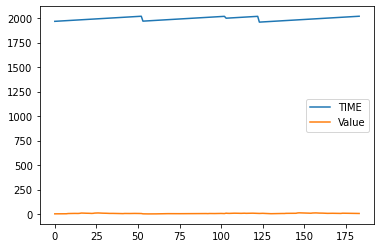

In [19]:
oecd.plot()
plt.show()

Weird, right? The x axis is just “hey, this is the 20th row, this is the 40th row, this is the 140th row” - nothing actually important. See where the little dips are in the blue line?

It’s also plotting both the unemployment and the year. What a wreck!

The major use cases for .plot() is when you have a meaningful index, which usually happens in two situations:
- You’ve just done a .value_counts() or a .groupby()
- You’ve used .set_index, probably with dates

Let’s take a look at how that works.

In [20]:
oecd.groupby('LOCATION')['Value'].mean()

LOCATION
AUS    6.002425
AUT    3.641595
BEL    7.727318
CAN    7.408743
Name: Value, dtype: float64

When you do a groupby and summarize a column, you get a Series, not a dataframe. The important thing is to look at the data on the left - the index - and realize that this time it means something! It’s a country’s name! And in terms of “other” rows, there’s only one - the average unemployment rate. So if we plot it…

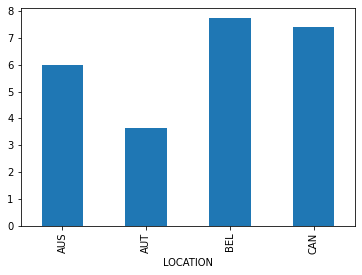

In [21]:
oecd.groupby('LOCATION')['Value'].mean().plot(kind='bar')
plt.show()

#### Plotting Version 2: .plot(x='col1') plots against a single specific column

Več o tem v naslednjem poglaviju.

#### Plotting Version 3: .plot(x='col1', y='col2') plots one specific column against another specific column

We know what we want, though - we want the year on the x axis and the unemployment rate on the y axis. If we give .plot both an x= and a y= we’ll be able to take care of that, right?

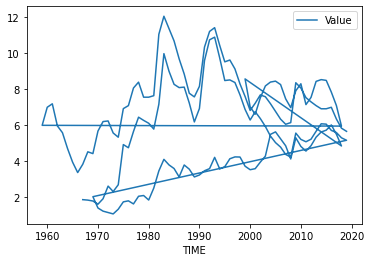

In [22]:
oecd.plot(x='TIME', y='Value')
plt.show()

When pandas plots, it assumes every single data point should be connected, aka pandas has no idea that we don’t want row 36 (Australia in 2016) to connect to row 37 (USA in 1980). In order to fix that, we just need to add in a groupby. Once we’ve grouped the data together by country, pandas will plot each group separately.

In [23]:
#oecd.groupby('LOCATION').plot(x='TIME', y='Value')
#plt.show()

Oh boy, maybe that was a little too separately! We’ll talk about this more when we discuss matplotlib-y stuff like figures, axes and subplots, but the basic idea is first we need to create a graph, and then we’ll tell pandas to keep drawing on top of the same graph for every single chart.

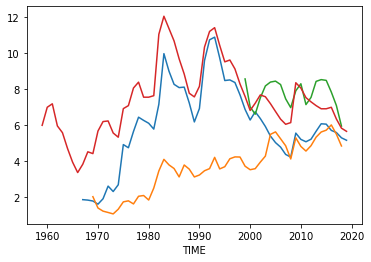

In [24]:
fig, ax = plt.subplots()
oecd.groupby('LOCATION').plot(x='TIME', y='Value', ax=ax, legend=False)
plt.show()

Overall, you just need to know if you have a meaningful index.
- Did you do a groupby or value_counts()? You can use .plot()
- Do you have a normal dataframe? You should probably set x and y.

## Seaborn

### Introduction to Seaborn

<div><p>So far, we've mostly worked with plots that are quick to analyze and make sense of.  Line charts, scatter plots, and bar plots allow us to convey a few nuggets of insights to the reader.  We've also explored how we can combine those plots in interesting ways to convey deeper insights and continue to extend the storytelling power of data visualization.  In this mission, we'll explore how to quickly create multiple plots that are subsetted using one or more conditions.</p>
<p>We'll be working with the <a target="_blank" href="http://seaborn.pydata.org/">seaborn</a> visualization library, which is built on top of matplotlib.  Seaborn has good support for more complex plots, attractive default styles, and integrates well with the pandas library. Here are some examples of some complex plots that can be created using seaborn:</p>
<p><img alt="Seaborn Gallery" src="images/seaborn_gallery.png"></p>
<p>Before we dive into seaborn, let's understand the data set we'll be working with in this mission.</p></div>

### Introduction to the Data Set

<div><p>We'll be working with a data set of the passengers of the Titanic.  The <a target="_blank" href="https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic">Titanic shipwreck</a> is the most famous shipwreck in history and led to the creation of better safety regulations for ships.  One substantial safety issue was that there were not enough lifeboats for every passenger on board, which meant that some passengers were prioritized over others to use the lifeboats.</p>
<p>The data set was compiled by Kaggle for their introductory data science competition, called <strong>Titanic: Machine Learning from Disaster</strong>.  The goal of the competition is to build machine learning models that can 
predict if a passenger survives from their attributes.  You can download the data set by navigating to the <a target="_blank" href="https://www.kaggle.com/c/titanic/data">data download page</a> for the competition and creating a free account.</p>
<p>The data for the passengers is contained in two files:</p>
<ul>
<li><code>train.csv</code>: Contains data on 712 passengers</li>
<li><code>test.csv</code>: Contains data on 418 passengers</li>
</ul>
<p>Each row in both data sets represents a passenger on the Titanic, and some information about them.  We'll be working with the <code>train.csv</code> file, because the <code>Survived</code> column, which describes if a given passenger survived the crash, is preserved in the file.  The column was removed in <code>test.csv</code>, to encourage competitors to practice making predictions using the data.  Here are descriptions for each of the columns in <code>train.csv</code>:</p>
<ul>
<li><code>PassengerId</code> -- A numerical id assigned to each passenger.  </li>
<li><code>Survived</code> -- Whether the passenger survived (<code>1</code>), or didn't (<code>0</code>).</li>
<li><code>Pclass</code> -- The class the passenger was in.</li>
<li><code>Name</code> -- the name of the passenger.</li>
<li><code>Sex</code> --  The gender of the passenger -- male or female.</li>
<li><code>Age</code> -- The age of the passenger.  Fractional.</li>
<li><code>SibSp</code> -- The number of siblings and spouses the passenger had on board.</li>
<li><code>Parch</code> -- The number of parents and children the passenger had on board.</li>
<li><code>Ticket</code> -- The ticket number of the passenger.</li>
<li><code>Fare</code> -- How much the passenger paid for the ticket.</li>
<li><code>Cabin</code> -- Which cabin the passenger was in.</li>
<li><code>Embarked</code> -- Where the passenger boarded the Titanic.</li>
</ul>
<p>Here's what the first few rows look like:</p>


<table>
<tbody><tr>
<th>PassengerId</th>
<th>Survived</th>
<th>Pclass</th>
<th>Name</th>
<th>Sex</th>
<th>Age</th>
<th>SibSp</th>
<th>Parch</th>
<th>Ticket</th>
<th>Fare</th>
<th>Cabin</th>
<th>Embarked</th>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td>3</td>
<td>Braund, Mr. Owen Harris</td>
<td>male</td>
<td>22.0</td>
<td>1</td>
<td>0</td>
<td>A/5 21171</td>
<td>7.2500</td>
<td></td>
<td>S</td>
</tr>
<tr>
<td>2</td>
<td>1</td>
<td>1</td>
<td>Cumings, Mrs. John Bradley (Florence Briggs Thayer)</td>
<td>female</td>
<td>38.0</td>
<td>1</td>
<td>0</td>
<td>PC 17599</td>
<td>71.2833</td>
<td>C85</td>
<td>C</td>
</tr>
<tr>
<td>3</td>
<td>1</td>
<td>3</td>
<td>Heikkinen, Miss. Laina</td>
<td>female</td>
<td>26.0</td>
<td>0</td>
<td>0</td>
<td>STON/O2. 3101282</td>
<td>7.9250</td>
<td></td>
<td>S</td>
</tr>
</tbody></table>

<p>Let's remove columns like <code>Name</code> and <code>Ticket</code> that we don't have a way to visualize.  In addition, we need to remove any rows containing missing values, as seaborn will throw errors when we try to plot missing values.</p></div>

> - Read train.csv into a DataFrame named titanic. Keep only the following columns:- 
    - "Survived"
    - "Pclass"
    - "Sex"
    - "Age"
    - "SibSp"
    - "Parch"
    - "Fare"
    - "Embarked"
- Use the DataFrame.dropna() method to remove rows containing missing values.



In [25]:
import pandas as pd
titanic = pd.read_csv('data/train.csv')
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[cols].dropna()

In [26]:
titanic.shape

(712, 8)

In [27]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Creating Histograms In Seaborn

<div><p>Seaborn works similarly to the <code>pyplot</code> module from matplotlib.  We primarily use seaborn interactively, by calling functions in its top level namespace.  Like the <code>pyplot</code> module from matplotlib, seaborn creates a matplotlib figure or adds to the current, existing figure each time we generate a plot.  When we're ready to display the plots, we call <code>pyplot.show()</code>.</p>
<p>To get familiar with seaborn, we'll start by creating the familiar histogram.  We can generate a histogram of the <code>Fare</code> column using the <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot"><code>seaborn.histplot()</code></a> function:</p>
</div>

In [28]:
import seaborn as sns    # seaborn is commonly imported as `sns`
import matplotlib.pyplot as plt

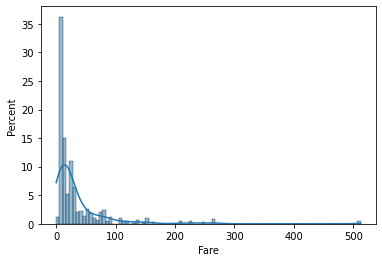

In [38]:
sns.histplot(titanic["Fare"], kde=True, stat="percent")
plt.show()

<p>Under the hood, seaborn creates a histogram using matplotlib, scales the axes values, and styles it.  In addition, seaborn uses a technique called kernel density estimation, or KDE for short, to create a smoothed line chart over the histogram.  If you're interested in learning about how KDE works, you can read more on <a target="_blank" href="https://en.wikipedia.org/wiki/Kernel_density_estimation">Wikipedia</a>.  </p>

<p>What you need to know for now is that the resulting line is a smoother version of the histogram, called a <strong>kernel density plot</strong>.  Kernel density plots are especially helpful when we're comparing distributions, which we'll explore later in this mission.  When viewing a histogram, our visual processing systems influence us to smooth out the bars into a continuous line.</p>

> - Import seaborn as sns and matplotlib.pyplot as plt.
- Use the seaborn.histplot() function to visualize the distribution of the "Age" column.
- Display the plot using plt.show().

/home/icta/python-analitika/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


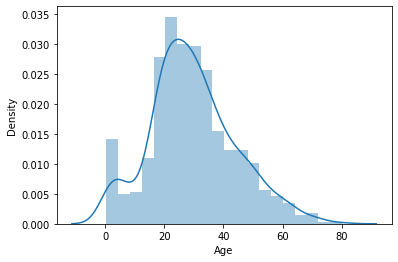

In [39]:
sns.distplot(titanic['Age'])
plt.show()

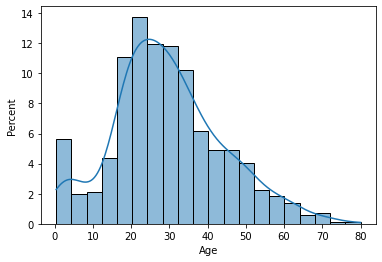

In [44]:
sns.histplot(titanic["Age"], kde=True, stat="percent")
plt.show()

### Generating A Kernel Density Plot

<div><p>While having both the histogram and the kernel density plot is useful when we want to explore the data, it can be overwhelming for someone who's trying to understand the distribution.  To generate just the kernel density plot, we use the <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot"><code>seaborn.kdeplot()</code></a> function:</p>
</div>

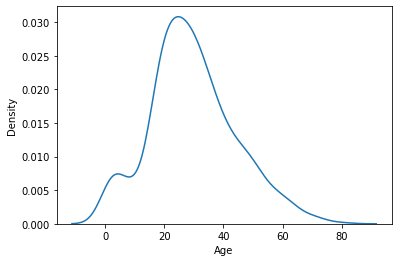

In [45]:
sns.kdeplot(titanic["Age"])
plt.show()

<p>While the distribution of data is displayed in a smoother fashion, it's now more difficult to visually estimate the area under the curve using just the line chart.  When we also had the histogram, the bars provided a way to understand and compare proportions visually.</p>

<p>To bring back some of the ability to easily compare proportions, we can shade the area under the line using a single color.  When calling the <code>seaborn.kdeplot()</code> function, we can shade the area under the line by setting the <code>shade</code> parameter to <code>True</code>.</p>

> - Generate a kernel density plot:
    - Using the values in the "Age" column
    - With the area under the curve shaded
- Set the x-axis label to "Age" using pyplot.xlabel().

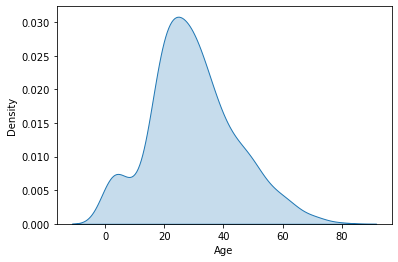

In [47]:
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')
plt.show()

### Modifying The Appearance Of The Plots

<div><p>From the plots in the previous step, you'll notice that seaborn:</p>
<ul>
<li>Sets the x-axis label based on the column name passed through <code>plt.xlabel()</code> function</li>
<li>Sets the background color to a light gray color</li>
<li>Hides the x-axis and y-axis ticks</li>
<li>Displays the coordinate grid</li>
</ul>
<p>In the last few missions, we explored some general aesthetics guidelines for plots.  The default seaborn style sheet gets some things right, like hiding axis ticks, and some things wrong, like displaying the coordinate grid and keeping all of the axis spines.  We can use the <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn.set_style"><code>seaborn.set_style()</code></a> function to change the default seaborn style sheet.  Seaborn comes with a few style sheets:</p>
<ul>
<li><code>darkgrid</code>: Coordinate grid displayed, dark background color</li>
<li><code>whitegrid</code>: Coordinate grid displayed, white background color</li>
<li><code>dark</code>: Coordinate grid hidden, dark background color</li>
<li><code>white</code>: Coordinate grid hidden, white background color</li>
<li><code>ticks</code>: Coordinate grid hidden, white background color, ticks visible</li>
</ul>
<p>Here's a diagram that compares the same plot across all styles:</p>
<p><img alt="Seaborn All Styles" src="images/seaborn_all_styles.png"></p>
<p>By default, the seaborn style is set to <code>"darkgrid"</code>:</p>
</div>

    sns.set_style("darkgrid")

<div>
<p>If we change the style sheet using this method, all future plots will match that style in your current session.  This means you need to set the style before generating the plot. </p>
<p>To remove the axis spines for the top and right axes, we use the <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.despine.html#seaborn.despine"><code>seaborn.despine()</code></a> function:</p>
</div>

    sns.despine()

<div>
<p>By default, only the top and right axes will be <strong>despined</strong>, or have their spines removed.  To despine the other two axes, we need to set the <code>left</code> and <code>bottom</code> parameters to <code>True</code>.</p></div>

> - Set the style to the style sheet that hides the coordinate grid and sets the background color to white.
- Generate a kernel density plot of the "Age" column, with the area under the curve shaded.
- Set the x-axis label to "Age".
- Despine all of the axes.

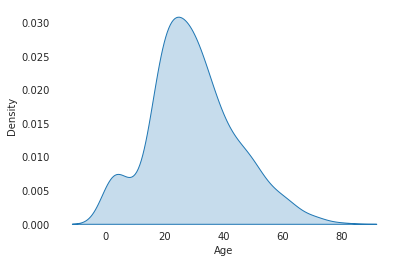

In [48]:
sns.set_style('white')
sns.kdeplot(titanic['Age'], shade=True)
sns.despine(left=True, bottom=True)
plt.xlabel('Age')
plt.show()

### Conditional Plots

<div><p>In the last few missions, we created a <a target="_blank" href="https://en.wikipedia.org/wiki/Small_multiple">small multiple</a>, which is a group of plots that have the same axis scales so the viewer can compare plots effectively.  We accomplished this by subsetting the data manually and generating a plot using matplotlib for each one.</p>
<p>In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want.  For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots.  One kernel density plot would visualize the distribution of values in the <code>"Age"</code> column where <code>Survived</code> equalled <code>0</code> and the other would visualize the distribution of values in the <code>"Age"</code> column where <code>Survived</code> equalled <code>1</code>.</p>
<p>Here's what those plots look like:</p>
<p><img alt="Simple Conditional KDE Plot" src="images/seaborn_simple_conditional.png"></p>
<p>The code to generate the pair of plots, is short and sweet:</p>
</div>

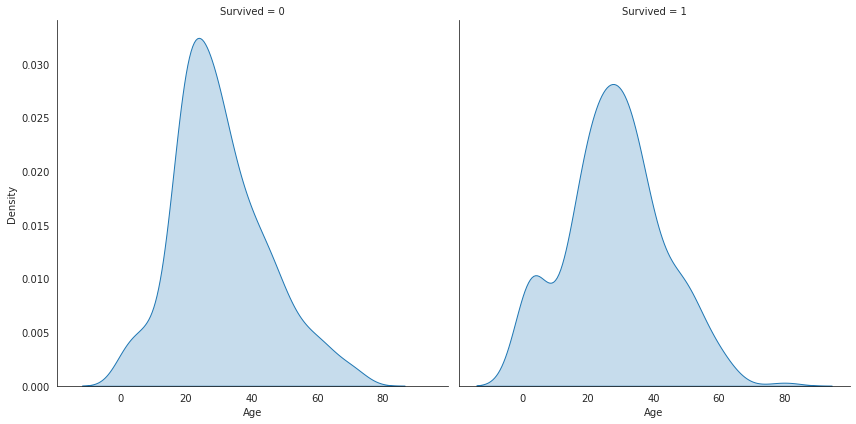

In [49]:
# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="Survived", height=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)
plt.show()

<div>
<p>Seaborn handled:</p>
<ul>
<li>subsetting the data into rows where <code>Survived</code> is <code>0</code> and where <code>Survived</code> is <code>1</code></li>
<li>creating both Axes objects, ensuring the same axis scales</li>
<li>plotting both kernel density plots</li>
</ul>
<p>Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values.  The <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid"><code>seaborn.FacetGrid</code></a> object is used to represent the layout of the plots in the grid and the columns used for subsetting the data.  The word "facet" from <code>FacetGrid</code> is another word for "subset".  Setting the <code>col</code> parameter to <code>"Survived"</code> specifies a separate plot for each unique value in the <code>Survived</code> column.  Setting the <code>hight</code> parameter to <code>6</code> specifies a height of 6 inches for each plot.</p>
<p>Once we've created the grid, we use the <code>FacetGrid.map()</code> method to specify the plot we want for each unique value of <code>Survived</code>.  Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.</p>
<p>The function that's passed into <code>FacetGrid.map()</code> has to be a valid matplotlib or seaborn function.  For example, we can map matplotlib histograms to the grid:</p>
</div>

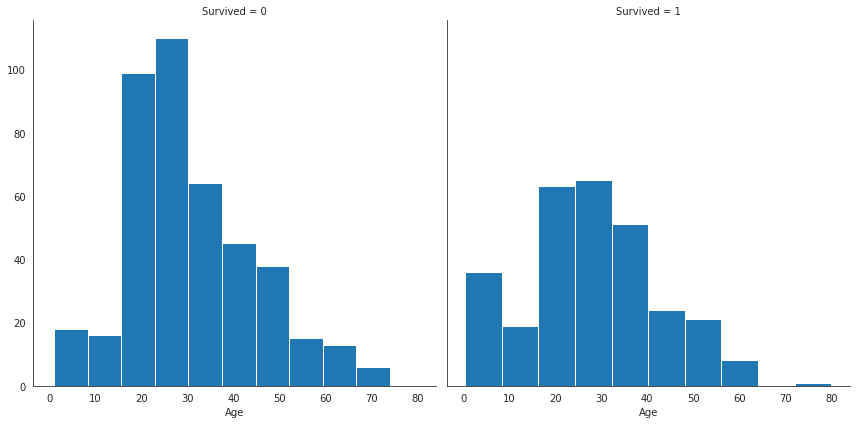

In [50]:
g = sns.FacetGrid(titanic, col="Survived", height=6)
g.map(plt.hist, "Age")
plt.show()

Let's create a grid of plots that displays the age distributions for each class.

> - Use a FacetGrid instance to generate three plots on the same row:
    - One for each unique value of Pclass.
    - Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
    - Each plot should have a height of 6 inches.
- Remove all of the spines using seaborn.despine().
- Display the plots.

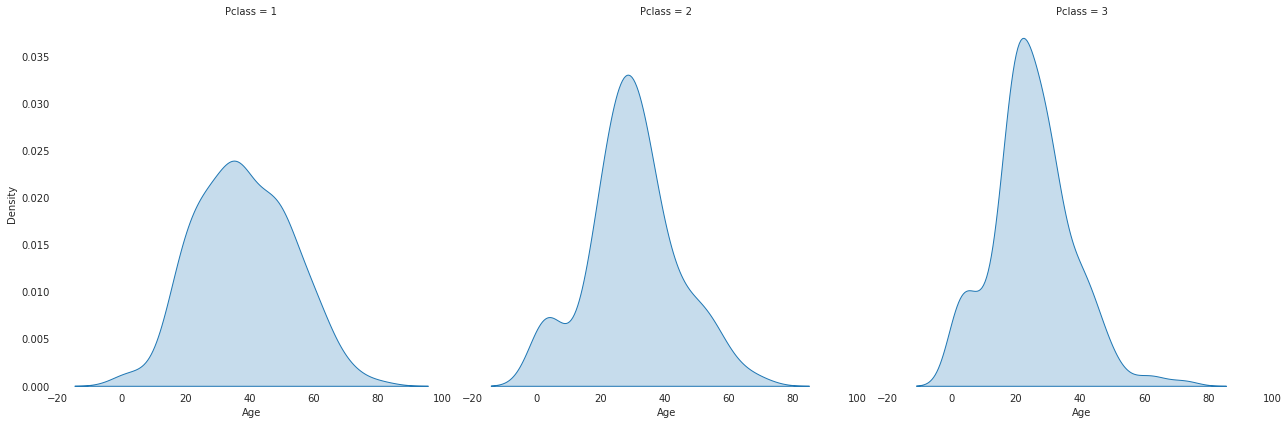

In [51]:
g = sns.FacetGrid(titanic, col='Pclass', height=6)
g.map(sns.kdeplot, 'Age', shade=True)
sns.despine(left=True, bottom=True)
plt.show()

<div><p>We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition.  When creating a <code>FacetGrid</code>, we use the <code>row</code> parameter to specify the column in the dataframe we want used to subset across the rows in the grid.  The best way to understand this is to see a working example.</p>
<p>The starter code subsets the dataframe on different combinations of unique values in both the <code>Pclass</code> and <code>Survived</code> columns.  Try changing the conditions to see the resulting plots.</p></div>

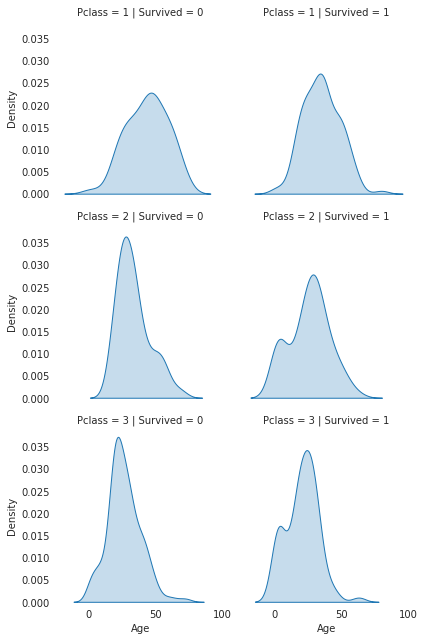

In [52]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

<div><p>When subsetting data using two conditions, the rows in the grid represented one condition while the columns represented another.  We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently.  Thankfully, we can add a condition just by setting the <code>hue</code> parameter to the column name from the dataframe.</p>
<p>Let's add a new condition to the grid of plots we generated in the last step and see what this grid of plots would look like.</p></div>

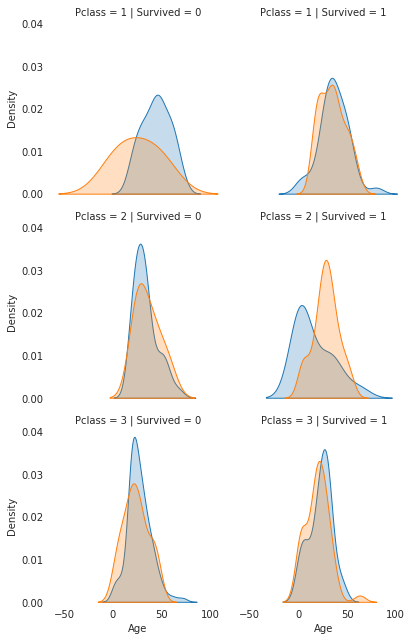

In [53]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue='Sex', height=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

###  Adding A Legend

<div><p>Now that we're coloring plots, we need a legend to keep track of which value each color represents.  As a challenge to you, we won't specify how exactly to generate a legend in seaborn.  Instead, we encourage you to use the examples from  the <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid">page</a> on plotting using the <code>FacetGrid</code> instance.</p>
<p>Here's what we want the final grid to look like:</p>
<p><img alt="Seaborn Three Conditions" src="images/seaborn_three_conditions.png"></p></div>

> - Use a FacetGrid instance to generate a grid of plots using the following conditions:
    - The Survived column across the columns in the grid.
    - The Pclass column across the rows in the grid.
    - The Sex column using different hues.
- Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
- Each plot should have a height of 3 inches.
- Remove all of the spines using seaborn.despine().
- Add a legend for the hues representing the values in the Sex column.
    - Make sure that you add your legend after despining.
- Display the plots.

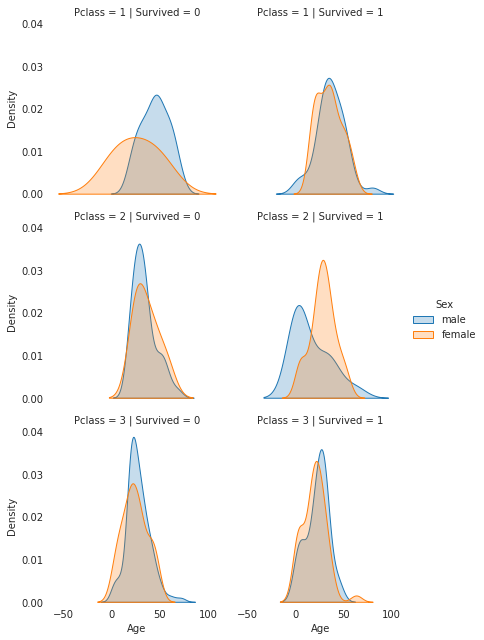

In [54]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue='Sex', height=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
g.add_legend()
plt.show()